In [ ]:
!pip install transformers
!pip install torch torchvision
!pip install pillow
!pip install pytesseract
!apt-get install -y tesseract-ocr




Saving thuyet-minh-ve-loai-cho.jpg to thuyet-minh-ve-loai-cho (1).jpg


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


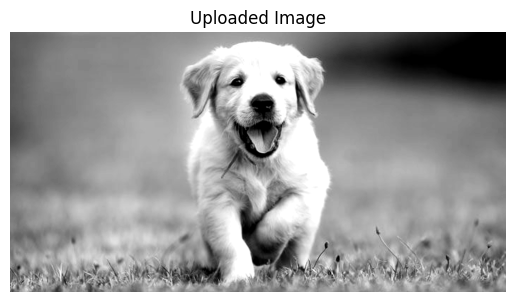

Text extracted from the image: Ve \
1 y ey f
’
| Sn Ps
: sa ¢
7 ’ e | - ' \ at i
1 : "4 nak a 1%
HE Uvited We ca Pay iy. aa
Re ‘Wegee 9 ON Os a a 4 &

Automatically generated description of the image: this is a black and white photo of a puppy running in the grass
Enter your description:  a dog
Detailed automatic description of the image: this is a black and white photo of a puppy running in the grass
Your description: a dog
Similarity between the description and the image: 42.92%


<ipython-input-4-dc4336473329>:46: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


In [4]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image, ImageEnhance
import pytesseract
import torch
import spacy
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

image = image.convert('L')
image = image.resize((image.width * 2, image.height * 2), Image.LANCZOS)
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(1.5)

text_from_image = pytesseract.image_to_string(image, lang='eng', config='--psm 6')

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model.generate(**inputs, max_length=1000, num_beams=10, early_stopping=True)

captions = processor.decode(outputs[0], skip_special_tokens=True)

# Display the uploaded image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

print(f"Text extracted from the image: {text_from_image}")
print(f"Automatically generated description of the image: {captions}")

user_description = input("Enter your description:  ")

nlp = spacy.load('en_core_web_sm')
doc1 = nlp(captions)
doc2 = nlp(user_description)

similarity = doc1.similarity(doc2)

print(f"Detailed automatic description of the image: {captions}")
print(f"Your description: {user_description}")
print(f"Similarity between the description and the image: {similarity * 100:.2f}%")
